In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import warnings
from aquarel import load_theme

warnings.filterwarnings('ignore')
plt.style.use('ggplot')
# plt.rc('text', usetex=True)
plt.rc('font', family='Arial', size=18)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=18)
plt.rc('lines', markersize=10)
plt.rc('lines', linewidth=2)
plt.rc('figure', titlesize=18)
plt.rc('figure', figsize=(8, 8))

In [7]:
# 1. Load the data into a Pandas DataFrame
df = pd.read_csv('./titanic.csv')

In [8]:
"""
•    PassengerId: The unique ID of each passenger
•    Survived: Whether the passenger survived (0 = No, 1 = Yes)
•    Pclass: The passenger’s class (1 = 1st, 2 = 2nd, 3 = 3rd)
•    Name: The passenger’s name
•    Sex: The passenger’s sex
•    Age: The passenger’s age
•    SibSp: The number of siblings/spouses the passenger had aboard
•    Parch: The number of parents/children the passenger had aboard
•    Ticket: The passenger’s ticket number
•    Fare: The fare paid by the passenger
•    Cabin: The passenger’s cabin number
•    Embarked: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
"""
# Replace the passenger’s class with First, Second, and Third
df['Pclass'] = df['Pclass'].replace({1: 'First', 2: 'Second', 3: 'Third'})
# Replace the values in the Embarked column with Cherbourg, Queenstown, and Southampton
df['Embarked'] = df['Embarked'].replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


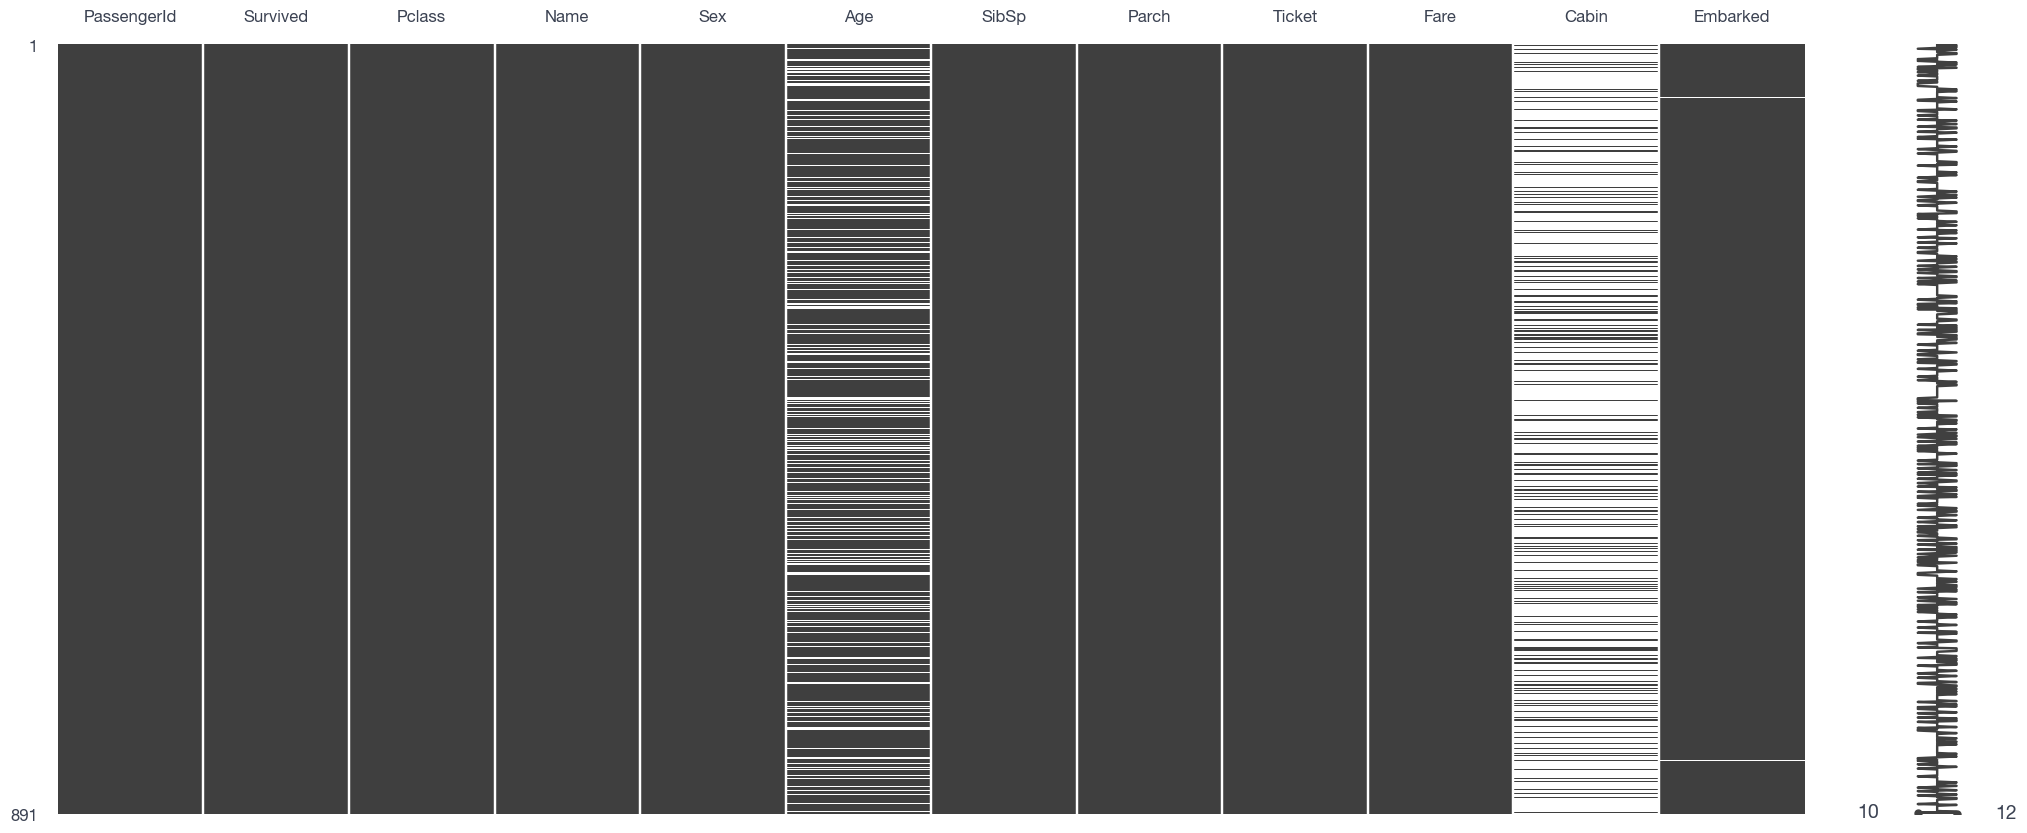

In [11]:
with load_theme('arctic_light'):
    msno.matrix(df)

In [12]:
df.shape

(891, 12)

In [13]:
# 2. How many passengers were on board the Titanic?
print(f'There were {df.shape[0]} passengers on board the Titanic.')

There were 891 passengers on board the Titanic.


In [14]:
df.shape[0], df.shape[1]

(891, 12)

In [15]:
# 3. What was the survival rate for passengers on the Titanic?
"""
To calculate the survival rate, we need to know how many passengers survived and how many passengers died.
"""
survived = df[df['Survived'] == 1]
died = df[df['Survived'] == 0]
survival_rate = survived.shape[0] / df.shape[0]
print(f'The survival rate for passengers on the Titanic was {survival_rate:.2%}.')

The survival rate for passengers on the Titanic was 38.38%.


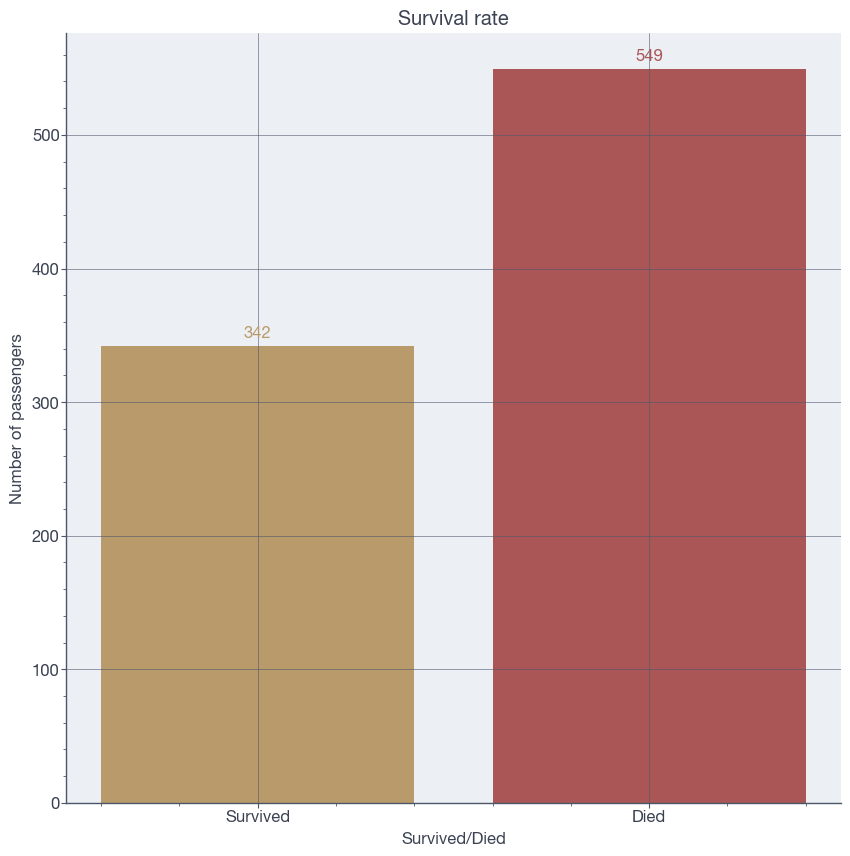

In [16]:
# Plot the survival rate, matplotlib only
fig, ax = plt.subplots(figsize=(10, 10))
plt.bar(['Survived', 'Died'], [survived.shape[0], died.shape[0]], color=['#B99B6B', '#AA5656'])
plt.text(0, survived.shape[0] + 10, survived.shape[0], ha='center', va='center', color='#B99B6B')
plt.text(1, died.shape[0] + 10, died.shape[0], ha='center', va='center', color='#AA5656')
plt.title('Survival rate')
plt.xlabel('Survived/Died')
plt.ylabel('Number of passengers')
plt.grid(True)
plt.show()

In [17]:
# 4. How many passengers in each class were on board the Titanic?
"""
Calculate the number of passengers in each class
"""
print(f'There were {df["Pclass"].nunique()} classes on board the Titanic.')
print(f'There were {df["Pclass"].value_counts()["First"]} first class passengers.')
print(f'There were {df["Pclass"].value_counts()["Second"]} second class passengers.')
print(f'There were {df["Pclass"].value_counts()["Third"]} third class passengers.')

There were 3 classes on board the Titanic.
There were 216 first class passengers.
There were 184 second class passengers.
There were 491 third class passengers.


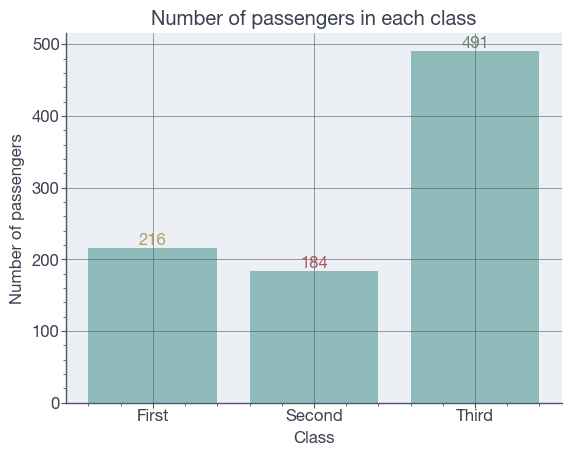

In [18]:
plt.bar(['First', 'Second', 'Third'], [df["Pclass"].value_counts()["First"], df["Pclass"].value_counts()["Second"],
                                       df["Pclass"].value_counts()["Third"]])
plt.text(0, df["Pclass"].value_counts()["First"] + 10, df["Pclass"].value_counts()["First"], ha='center', va='center',
         color='#B99B6B')
plt.text(1, df["Pclass"].value_counts()["Second"] + 10, df["Pclass"].value_counts()["Second"], ha='center', va='center',
         color='#AA5656')
plt.text(2, df["Pclass"].value_counts()["Third"] + 10, df["Pclass"].value_counts()["Third"], ha='center', va='center',
         color='#698269')
plt.title('Number of passengers in each class')
plt.xlabel('Class')
plt.ylabel('Number of passengers')
plt.show()

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Second,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton
887,888,1,First,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Southampton
888,889,0,Third,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton
889,890,1,First,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,Cherbourg


In [20]:
# 5. What was the average fare paid by passengers on the Titanic?
"""
Calculate the average fare paid by passengers on the Titanic, by class
"""
avg_fare = df.groupby('Pclass')['Fare'].mean() # Group the data by class and calculate the mean fare
print(f'The average fare paid by first class passengers was ${avg_fare["First"]:2f}.')
print(f'The average fare paid by second class passengers was ${avg_fare["Second"]:.2f}.')
print(f'The average fare paid by third class passengers was ${avg_fare["Third"]:.2f}.')
print(f'The average fare paid by all passengers was ${df["Fare"].mean():.2f}.')
print(avg_fare)

The average fare paid by first class passengers was $84.154687.
The average fare paid by second class passengers was $20.66.
The average fare paid by third class passengers was $13.68.
The average fare paid by all passengers was $32.20.
Pclass
First     84.154687
Second    20.662183
Third     13.675550
Name: Fare, dtype: float64


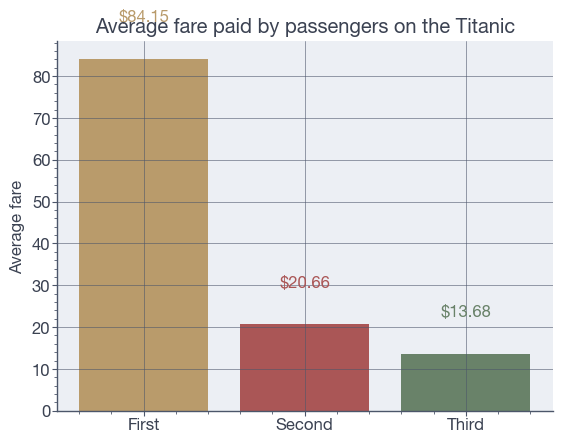

In [21]:
# Plot the average fare paid by passengers on the Titanic
plt.bar(['First', 'Second', 'Third'], [avg_fare["First"], avg_fare["Second"], avg_fare["Third"]],
        color=['#B99B6B', '#AA5656', '#698269'])
plt.text(0, avg_fare["First"] + 10, f'${avg_fare["First"]:.2f}', ha='center', va='center', color='#B99B6B')
plt.text(1, avg_fare["Second"] + 10, f'${avg_fare["Second"]:.2f}', ha='center', va='center', color='#AA5656')
plt.text(2, avg_fare["Third"] + 10, f'${avg_fare["Third"]:.2f}', ha='center', va='center', color='#698269')
plt.title('Average fare paid by passengers on the Titanic')
plt.ylabel('Average fare')
plt.show()

In [22]:
# 6. How many passengers were male and how many were female?
"""
Count value in Sex column
"""
nb_of_males = df['Sex'].value_counts()['male']
nb_of_female = df['Sex'].value_counts()['female']
print(f'There are {nb_of_males} and {nb_of_female} in the boat')

There are 577 and 314 in the boat


In [23]:
# 7. What was the average age of male and female passengers?
average_age_by_sex = df.groupby("Sex")["Age"].mean()
print("Average age by sex:")
print(average_age_by_sex)

Average age by sex:
Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64


In [24]:
# 8. What was the median age of passengers on the Titanic?
median_age = df["Age"].median()
print(f'The median age of passengers on the Titanic was {median_age:.2f} years old.')

The median age of passengers on the Titanic was 28.00 years old.


In [25]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Second,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton
887,888,1,First,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Southampton
888,889,0,Third,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton
889,890,1,First,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,Cherbourg


In [26]:
# 9. How many passengers had siblings or spouses on board the Titanic?
# Count the number of siblings and spouses
nb_of_siblings_and_spouses = df["SibSp"].sum()
print(f'There were {nb_of_siblings_and_spouses} siblings and spouses on board the Titanic.')

There were 466 siblings and spouses on board the Titanic.


In [27]:
# 10. How many passengers had parents or children on board the Titanic?
# Count the number of parents and children
nb_of_parents_and_children = df["Parch"].sum()
print(f'There were {nb_of_parents_and_children} parents and children on board the Titanic.')

There were 340 parents and children on board the Titanic.


In [28]:
# 11. What was the survival rate for passengers who had siblings or spouses on board the Titanic?
# Calculate the survival rate for passengers who had siblings or spouses on board the Titanic
survival_rate_siblings_spouses = survived["SibSp"].sum() / df["SibSp"].sum()
print(
    f'The survival rate for passengers who had siblings or spouses on board the Titanic was {survival_rate_siblings_spouses:.2%}.')

The survival rate for passengers who had siblings or spouses on board the Titanic was 34.76%.


In [29]:
# 12. What was the survival rate for passengers who had parents or children on board the Titanic?
# Calculate the survival rate for passengers who had parents or children on board the Titanic
survival_rate_parents_children = survived["Parch"].sum() / df["Parch"].sum()
print(
    f'The survival rate for passengers who had parents or children on board the Titanic was {survival_rate_parents_children:.2%}.')

The survival rate for passengers who had parents or children on board the Titanic was 46.76%.


In [30]:
# 13. What was the survival rate for passengers in each class?
# Calculate the survival rate for passengers in each class
survival_rate_class = survived["Pclass"].value_counts() / df["Pclass"].value_counts()
print(f'The survival rate for first class passengers was {survival_rate_class["First"]:.2%}.')
print(f'The survival rate for second class passengers was {survival_rate_class["Second"]:.2%}.')
print(f'The survival rate for third class passengers was {survival_rate_class["Third"]:.2%}.')

The survival rate for first class passengers was 62.96%.
The survival rate for second class passengers was 47.28%.
The survival rate for third class passengers was 24.24%.


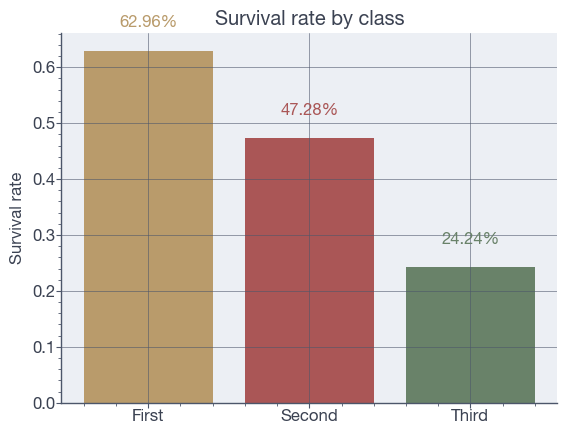

In [31]:
# Plot survival rate by class on a bar chart
plt.bar(['First', 'Second', 'Third'], [survival_rate_class["First"], survival_rate_class["Second"], survival_rate_class["Third"]],
        color=['#B99B6B', '#AA5656', '#698269'])
plt.text(0, survival_rate_class["First"] + 0.05, f'{survival_rate_class["First"]:.2%}', ha='center', va='center',
         color='#B99B6B')
plt.text(1, survival_rate_class["Second"] + 0.05, f'{survival_rate_class["Second"]:.2%}', ha='center', va='center',
            color='#AA5656')
plt.text(2, survival_rate_class["Third"] + 0.05, f'{survival_rate_class["Third"]:.2%}', ha='center', va='center',
            color='#698269')
plt.title('Survival rate by class')
plt.ylabel('Survival rate')
plt.show()

In [32]:
# 14. What was the survival rate for male and female passengers?
survival_by_sex = df.groupby("Sex")["Survived"].mean()
print("Survival rate by sex:")
print(survival_by_sex)

Survival rate by sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [33]:
# 15. Which port of embarkation had the highest survival rate?
survival_by_embarkation = df.groupby("Embarked")["Survived"].mean()
print("Survival rate by embarkation:")
print(survival_by_embarkation)
print(f'The highest survival rate was {survival_by_embarkation.max():.2%} for passengers who embarked at port {survival_by_embarkation.idxmax()}.')

Survival rate by embarkation:
Embarked
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.336957
Name: Survived, dtype: float64
The highest survival rate was 55.36% for passengers who embarked at port Cherbourg.


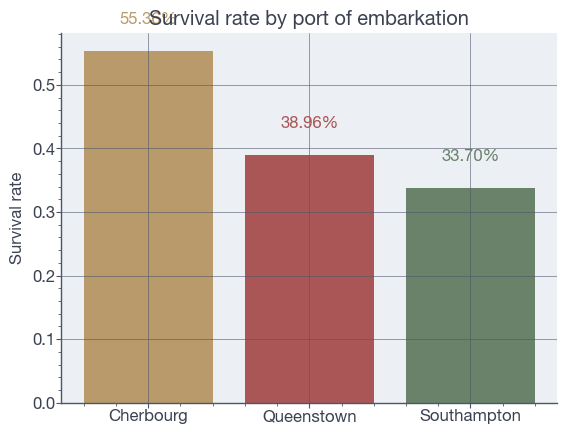

In [34]:
# Plot embarked survival rate by port
plt.bar(['Cherbourg', 'Queenstown', 'Southampton'], [survival_by_embarkation["Cherbourg"], survival_by_embarkation["Queenstown"],
                                                     survival_by_embarkation["Southampton"]],
        color=['#B99B6B', '#AA5656', '#698269'])
plt.text(0, survival_by_embarkation["Cherbourg"] + 0.05, f'{survival_by_embarkation["Cherbourg"]:.2%}', ha='center', va='center',
         color='#B99B6B')
plt.text(1, survival_by_embarkation["Queenstown"] + 0.05, f'{survival_by_embarkation["Queenstown"]:.2%}', ha='center', va='center',
            color='#AA5656')
plt.text(2, survival_by_embarkation["Southampton"] + 0.05, f'{survival_by_embarkation["Southampton"]:.2%}', ha='center', va='center',
            color='#698269')
plt.title('Survival rate by port of embarkation')
plt.ylabel('Survival rate')
plt.show()